# 1.0 Introduction

***prepared by [Hui Hui](https://www.kaggle.com/leowhuihui)***

This analysis is to explore the sales trend of highrise building with regards to valuation price, built up price, property type, and quarter date of sales.

## 1.1 Objectives
The objectives are to explore the sales within three buildings and compare amongst them based on the price trend of quarter from year 2016 to 2019 with the data available.
The visualizations that are of interest listed down below with headers referring to these visualization respectively. 

1. Average Sales Price (psf) vs Quarter Year Between Three Buildings
2. Differences Between Median Price and Average Price within Three Buildings
3. Median Valuation Price with respect to Quarter Year within Three Buildings

## 1.2 Data Cleaning
Cleaning the data and rename columns name for my preferable column headers.

In [1]:
# Importing libraries
%pip install seaborn
#%pip install plotly
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
#import plotly.express as px

In [2]:
# Reading the data
%pip install openpyxl

df = pd.DataFrame(pd.read_excel('DataCaseStudy2.xlsx', sheet_name='Q2 data'))
print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


In [3]:
# Check the data
df

,Id,Property building category,Property building type 1,Title,Built up price psf,Size built up,Valuation price,YEAR,QUARTER,NAME,Year completion,Property building category 2,Property building type 2
0,464152,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,981.436464,905,888200,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
1,464156,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1049.723757,905,950000,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
2,464157,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,892.370572,367,327500,2014,20142,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
3,464158,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1061.516854,356,377900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
4,469885,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1059.334126,841,890900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,838224,HIGHRISE,CONDO,RESIDENTIAL,404.024145,2485,1004000,2019,20191,RAINBOW APARTMENT,1987,HIGHRISE,CONDO
247,463159,HIGHRISE,CONDO,RESIDENTIAL,513.721186,2733,1404000,2015,20153,RAINBOW APARTMENT,1987,HIGHRISE,CONDO
248,558463,HIGHRISE,CONDO,RESIDENTIAL,415.660446,2733,1136000,2017,20173,RAINBOW APARTMENT,1987,HIGHRISE,CONDO
249,519187,HIGHRISE,CONDO,RESIDENTIAL,769.509982,2755,2120000,2016,20161,RAINBOW APARTMENT,1987,HIGHRISE,CONDO


In [4]:
# Drop columns that is not going to use in the analysis
df_overall = df.drop(columns=['Property building category 2', 'Property building type 2'])
# Rename columns
df_overall.rename(columns={'Property building category':'bld_category', 'Property building type 1':'bld_type', 'Built up price psf':'price_psf', 'Size built up':'bup_size', 'Valuation price':'val_price', 'Year completion':'year_comp'}, inplace=True)
# Drop rows that is not going to use in the analysis
df_overall = df_overall[~df['NAME'].isin(['ASTRA SUITES', 'FLAT JALAN AMAN'])]
# Reset index after removing rows
df_overall = df_overall.reset_index()
# Remove "index" column which appeared after resetting index
df_overall = df_overall.drop(columns=['index'])
df_overall

,Id,bld_category,bld_type,Title,price_psf,bup_size,val_price,YEAR,QUARTER,NAME,year_comp
0,491472,HIGHRISE,CONDO,RESIDENTIAL,915.566133,743,680000,2014,20144,HARBOURVIEW,1994
1,497369,HIGHRISE,CONDO,RESIDENTIAL,1095.926202,730,800000,2014,20144,HARBOURVIEW,1994
2,463182,HIGHRISE,CONDO,RESIDENTIAL,746.270274,1313,980000,2015,20152,HARBOURVIEW,1994
3,463184,HIGHRISE,CONDO,RESIDENTIAL,1025.923075,1755,1800000,2015,20152,HARBOURVIEW,1994
4,467650,HIGHRISE,CONDO,RESIDENTIAL,1110.797146,743,825000,2015,20152,HARBOURVIEW,1994
...,...,...,...,...,...,...,...,...,...,...,...
144,838224,HIGHRISE,CONDO,RESIDENTIAL,404.024145,2485,1004000,2019,20191,RAINBOW APARTMENT,1987
145,463159,HIGHRISE,CONDO,RESIDENTIAL,513.721186,2733,1404000,2015,20153,RAINBOW APARTMENT,1987
146,558463,HIGHRISE,CONDO,RESIDENTIAL,415.660446,2733,1136000,2017,20173,RAINBOW APARTMENT,1987
147,519187,HIGHRISE,CONDO,RESIDENTIAL,769.509982,2755,2120000,2016,20161,RAINBOW APARTMENT,1987


In [5]:
# Set "QUARTER" as string type for further cleaning
df_overall.QUARTER = df_overall.QUARTER.astype(str)
# Drop rows that is not in quarter year from 2016 to 2019
qy = ['20161', '20162', '20163', '20164', '20171', '20172', '20173', '20174', '20181', '20182', '20183', '20184', '20191', '20192']
df_overallqy = df_overall[df_overall.QUARTER.isin(qy)]
# Reset index after drop rows
df_overallqy = df_overallqy.reset_index()
# Drop "index" column which appeared after resetting index
df_overallqy = df_overallqy.drop(columns=['index'])
df_overallqy

,Id,bld_category,bld_type,Title,price_psf,bup_size,val_price,YEAR,QUARTER,NAME,year_comp
0,472124,HIGHRISE,CONDO,RESIDENTIAL,1144.457666,743,850000,2016,20164,HARBOURVIEW,1994
1,474464,HIGHRISE,CONDO,RESIDENTIAL,1112.219422,764,850000,2016,20163,HARBOURVIEW,1994
2,480855,HIGHRISE,CONDO,RESIDENTIAL,1184.850289,743,880000,2016,20164,HARBOURVIEW,1994
3,481989,HIGHRISE,CONDO,RESIDENTIAL,1157.921874,743,860000,2016,20164,HARBOURVIEW,1994
4,485931,HIGHRISE,CONDO,RESIDENTIAL,1186.611961,3455,4100000,2016,20162,HARBOURVIEW,1994
...,...,...,...,...,...,...,...,...,...,...,...
97,474357,HIGHRISE,CONDO,RESIDENTIAL,720.724346,2485,1791000,2016,20163,RAINBOW APARTMENT,1987
98,838224,HIGHRISE,CONDO,RESIDENTIAL,404.024145,2485,1004000,2019,20191,RAINBOW APARTMENT,1987
99,558463,HIGHRISE,CONDO,RESIDENTIAL,415.660446,2733,1136000,2017,20173,RAINBOW APARTMENT,1987
100,519187,HIGHRISE,CONDO,RESIDENTIAL,769.509982,2755,2120000,2016,20161,RAINBOW APARTMENT,1987


In [6]:
# Reading data for average price psf
df_average = pd.DataFrame(pd.read_excel('DataCaseStudy2.xlsx', sheet_name='Average Price psf'))
df_average

,NAME,20161,20162,20163,20164,20171,20172,20173,20174,Unnamed: 9,20181,Unnamed: 11,20182,20183,20184,20191,20192
0,ASTRA SUITES,989.499389,1010.762943,1015.867725,981.426457,1023.978202,NaN,1084.041726,1037.730766,NaN,997.689968,NaN,885.216631,963.778181,1455.040872,NaN,NaN
1,FLAT JALAN AMAN,272.532220,240.681435,189.336062,272.726710,NaN,NaN,228.022875,175.952716,NaN,NaN,NaN,NaN,NaN,240.681435,208.590577,160.45429
2,HARBOURVIEW,1104.328349,1117.415274,1004.500013,1162.409943,NaN,1066.100391,NaN,NaN,NaN,1221.497220,NaN,1267.146133,1331.545392,NaN,NaN,NaN
3,LILY POINT,551.953320,514.609944,520.465177,585.349835,506.640321,473.623311,456.187727,471.346276,NaN,614.249116,NaN,470.379558,441.137609,418.110617,NaN,NaN
4,RAINBOW APARTMENT,769.509982,NaN,735.967207,891.577928,356.727977,NaN,415.660446,723.883707,NaN,826.234269,NaN,NaN,882.381413,740.063731,404.024145,NaN


In [7]:
# Drop empty columns
df_average = df_average.drop(columns=['Unnamed: 9', 'Unnamed: 11'])
# Drop rows that is not going to use in analysis
df_average = df_average[~df_average['NAME'].isin(['ASTRA SUITES', 'FLAT JALAN AMAN'])]
# Reset index after removing rows
df_average = df_average.reset_index()
# Remove "index" column which appeared after resetting index
df_average = df_average.drop(columns=['index'])
# Round only the float columns to one decimal place
numeric_cols = df_average.select_dtypes(include=['float64']).columns
df_average[numeric_cols] = df_average[numeric_cols].round(1)
df_average

,NAME,20161,20162,20163,20164,20171,20172,20173,20174,20181,20182,20183,20184,20191,20192
0,HARBOURVIEW,1104.3,1117.4,1004.5,1162.4,NaN,1066.1,NaN,NaN,1221.5,1267.1,1331.5,NaN,NaN,NaN
1,LILY POINT,552.0,514.6,520.5,585.3,506.6,473.6,456.2,471.3,614.2,470.4,441.1,418.1,NaN,NaN
2,RAINBOW APARTMENT,769.5,NaN,736.0,891.6,356.7,NaN,415.7,723.9,826.2,NaN,882.4,740.1,404.0,NaN


# 2.0 Visualization and Observation
Cleaning and transformation of dataset is done. The dataset is now ready to be used for visualization.

## 2.1 Average Sales Price (psf) vs Quarter Year Between Three Buildings
Plot a Line Chart to see the Average Sales Price (psf) changes with respect to Quarter Year from 2016 to 2019 within three buildings.

In [8]:
# Create dataset for mean value
df_avg_chart = pd.DataFrame(df_overallqy.groupby(['QUARTER', 'NAME'])['price_psf'].mean())
# Reset index
df_avg_chart = df_avg_chart.reset_index()
df_avg_chart
# Round the decimals
price_cols = df_avg_chart.select_dtypes(include=['float64']).columns
df_avg_chart[price_cols] = df_avg_chart[price_cols].round(0)
df_avg_chart

,QUARTER,NAME,price_psf
0,20161,HARBOURVIEW,1104.0
1,20161,LILY POINT,552.0
2,20161,RAINBOW APARTMENT,770.0
3,20162,HARBOURVIEW,1117.0
4,20162,LILY POINT,515.0
5,20163,HARBOURVIEW,1005.0
6,20163,LILY POINT,520.0
7,20163,RAINBOW APARTMENT,736.0
8,20164,HARBOURVIEW,1162.0
9,20164,LILY POINT,585.0


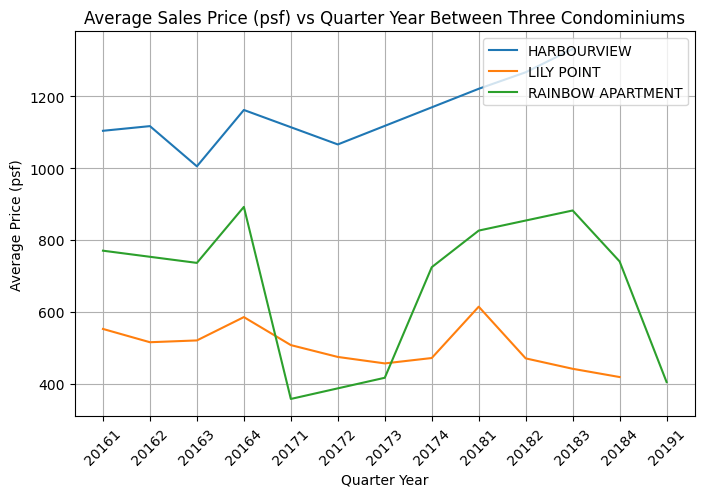

In [9]:
# Plot line chart with dataframe above
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=df_avg_chart, x='QUARTER', y='price_psf', hue="NAME")
plt.grid()
plt.title('Average Sales Price (psf) vs Quarter Year Between Three Condominiums')
plt.xlabel('Quarter Year')
plt.ylabel('Average Price (psf)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout
plt.show()

## 2.2 Differences Between Median Price and Average Price within Three Buildings
Plot another Line Chart that shows the median price (psf) across time and explore the difference between the median and average value within these three buildings.

In [10]:
# Create dataset for median value
df_compare_chart = pd.DataFrame(df_overallqy.groupby(['QUARTER', 'NAME'])['price_psf'].median())
# Reset index
df_compare_chart.reset_index(inplace=True)
# Rename column
df_compare_chart.rename(columns={'price_psf':'median'}, inplace=True)
df_compare_chart['mean'] = df_overallqy['price_psf']
# Round the decimals of "median" column
df_compare_chart['median'] = df_compare_chart['median'].astype(int)
# Round the decimals of "mean" column
df_compare_chart['mean'] = df_compare_chart['mean'].astype(int)
df_compare_chart

,QUARTER,NAME,median,mean
0,20161,HARBOURVIEW,1104,1144
1,20161,LILY POINT,523,1112
2,20161,RAINBOW APARTMENT,769,1184
3,20162,HARBOURVIEW,1099,1157
4,20162,LILY POINT,514,1186
5,20163,HARBOURVIEW,985,1066
6,20163,LILY POINT,546,1026
7,20163,RAINBOW APARTMENT,735,1182
8,20164,HARBOURVIEW,1157,1099
9,20164,LILY POINT,537,985


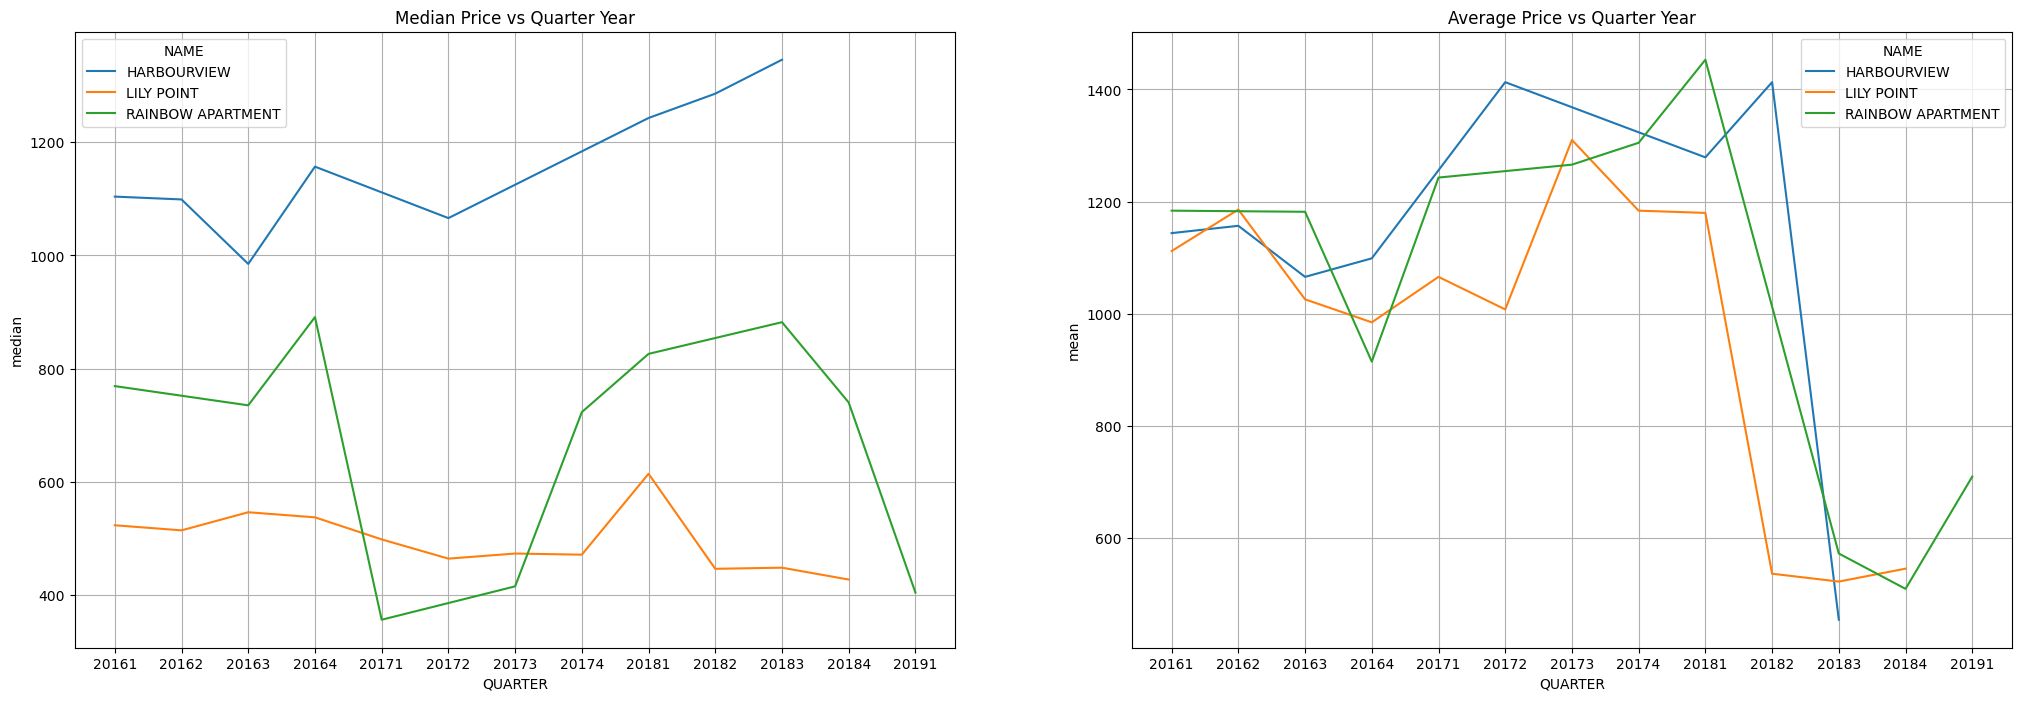

In [11]:
# Plot two plots to compare dataset
fig, ax=plt.subplots(1,2,figsize=(25,8))

sns.lineplot(data=df_compare_chart, x='QUARTER', y='median', hue='NAME', ax=ax[0])
ax[0].grid(True) 
ax[0].set_title('Median Price vs Quarter Year')

sns.lineplot(data=df_compare_chart, x='QUARTER', y='mean', hue='NAME', ax=ax[1])
ax[1].grid(True)
ax[1].set_title('Average Price vs Quarter Year')

plt.tight_layout
plt.show()

## 2.2 Median Valuation Price with respect to Quarter Year within Three Buildings
Plot a Line Chart that shows the Median Valuation Price across time for these three buildings.

In [12]:
# Create dataset for median valuation price
df_mval_chart = pd.DataFrame(df_overallqy.groupby(['QUARTER', 'NAME'])['val_price'].median())
# Reset index
df_mval_chart.reset_index(inplace=True)
# Rename column
df_mval_chart.rename(columns={'val_price':'val_median'}, inplace=True)
df_mval_chart

,QUARTER,NAME,val_median
0,20161,HARBOURVIEW,1762500.0
1,20161,LILY POINT,574500.0
2,20161,RAINBOW APARTMENT,2120000.0
3,20162,HARBOURVIEW,850000.0
4,20162,LILY POINT,565000.0
5,20163,HARBOURVIEW,850000.0
6,20163,LILY POINT,600000.0
7,20163,RAINBOW APARTMENT,1671500.0
8,20164,HARBOURVIEW,860000.0
9,20164,LILY POINT,590000.0


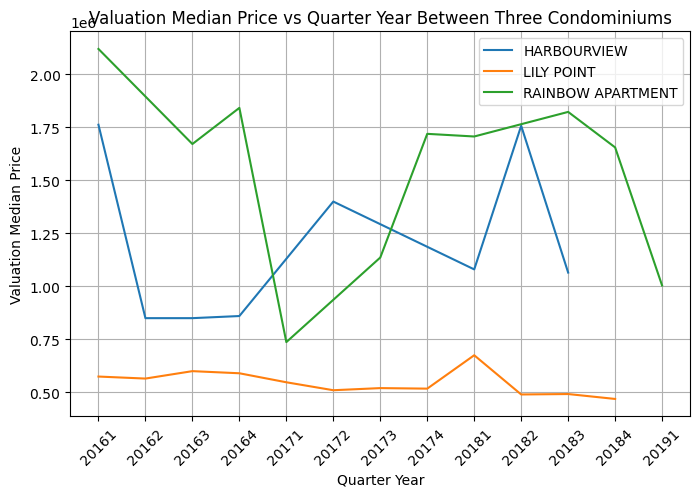

In [13]:
# Plot line chart with dataframe above
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=df_mval_chart, x='QUARTER', y='val_median', hue="NAME")
plt.grid()
plt.title('Valuation Median Price vs Quarter Year Between Three Condominiums')
plt.xlabel('Quarter Year')
plt.ylabel('Valuation Median Price')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout
plt.show()

# 3.0 Observation 
1. The Harbourview is the most expensive property compared to the other two. The selling price is generally increasing especially in year 2018. This may be due to several factors for example desirable location, quality of the building, higher demand and lower supply of units. From this data, we might assume that Harbourview could be a choice for investment. Although the year of completion of this building was year of 1994, the trend of selling price is significantly increasing.
2. From the data shown, Lily Point has the highest number of demand. This could be due to the price which is more affordable to buyers. However, it has a declining trend in selling price. Rainbow Apartment has a fluctuating trend in term of selling price. The significant decline and rebound of price might due to several factors. The building condition could be a reason that led to reduce prices since it was built in year 1987.
3. We can clearly see that the Harbourview and Rainbow Apartment have higher median valuation price compared to Lily Point. However, the fluctuations in prices and inconsistency of sales may indicate market volatility. Lily Point is generally having more consistent of sales and stable median valuation price. This might be a more
favourable and afforable property among buyers of middle range income. 

# 4.0 Conclusion
Based on the various visualizations explored in this notebook, the key findings are summarized as follows:
1. We can see the Harbourview has the highest Average Sales Price (psf) compared to the rest, where Lily Point has the lowest among them.
2. We can infer that the Average Sales Price (psf) for each neighborhood experienced a notable decrease at the beginning of 2018.
3. Valuation Median Price for Lily Point is the lowest compared to the other two.

***Prepared by Hui Hui*** [Kaggle](https://www.kaggle.com/leowhuihui) [Github](https://github.com/aloeverahui)